In [17]:
# Import Dependencies
import matplotlib.pyplot as plt
import requests as req
import pandas as pd
import numpy as np
import seaborn
import random
import datetime
import time
import json
import os

from marvel_keys import apikey, privateKey, marvel_char_list 

In [18]:
csv_path = os.path.join('marvel_data.csv')

marvel_df = pd.read_csv(csv_path)

In [19]:
marvel_df['name'][:2800].head()

0         Spider-Man 
1    Captain America 
2          Wolverine 
3           Iron Man 
4               Thor 
Name: name, dtype: object

In [20]:
loop_test = ['Iron Man', 'Captain America', 'Thor', 'Black Widow', 'Hulk']

## API Request and Data Retrieval

In [21]:
import hashlib
import urllib.parse
import urllib.request

In [22]:
url = 'https://gateway.marvel.com:443/v1/public/characters'

ts = str(round(time.time()))

hsh = hashlib.md5(bytes(ts+privateKey+apikey, 'utf-8')).hexdigest()

In [23]:
url = 'https://gateway.marvel.com:443/v1/public/characters'

#Initialize python dict containing data

marvel_data = []

for hero in marvel_char_list:
    
    search_data = {'id':[],
                'name':[],
               'description':[],
                'comics_avail':[],
                'comics_list':[],
                'series_avail':[],
                'series_list':[],
                'stories_avail':[],
                'stories_list':[]}
    
    #Set parameters for search
    params = {'ts': ts,
            'apikey': apikey,
              'hash': hsh,
             'name': hero,
             'limit': '100'}
    
    #Set up response request
    response = req.get(url, params=params).json()
    
    try:
        #Extract data initial data
        hero_data = response['data']['results'][0]
        search_data['id'].append(hero_data['id'])
        search_data['name'].append(hero_data['name'])
        search_data['description'].append(hero_data['description'])
        search_data['comics_avail'].append(hero_data['comics']['available'])
        search_data['series_avail'].append(hero_data['series']['available'])
        search_data['stories_avail'].append(hero_data['stories']['available'])

        #Set length of comics, series, and stories to iterate over
        comics_length = len(hero_data['comics']['items'])
        series_length = len(hero_data['series']['items'])
        stories_length = len(hero_data['stories']['items'])

        #Iterate through items of comics, series and stories to obtain names
        for n in range(comics_length):
            comics_list = hero_data['comics']['items'][n]
            search_data['comics_list'].append(comics_list['name'])

        for n in range(series_length):
            series_list = hero_data['series']['items'][n]
            search_data['series_list'].append(series_list['name'])

        for n in range(stories_length):
            stories_list = hero_data['stories']['items'][n]
            search_data['stories_list'].append(stories_list['name'])
            
        marvel_data.append(search_data.copy())
        
    except IndexError:
        print(f'Having Error with {hero}')

Having Error with A-Bomb
Having Error with Abomination
Having Error with Aegis
Having Error with Agent X
Having Error with Air-Walker
Having Error with American Eagle
Having Error with Amphibian
Having Error with Angel
Having Error with Angela
Having Error with Ant-Man
Having Error with Araٌa
Having Error with Armor
Having Error with Atlas
Having Error with Azazel
Having Error with Baron Zemo
Having Error with Beetle
Having Error with Black Knight
Having Error with Black Widow/Natasha Romanoff
Having Error with Bride of Nine Spiders
Having Error with Brotherhood of Mutants
Having Error with Captain America/Steve Rogers
Having Error with Captain Marvel
Having Error with Contessa
Having Error with Cosmo
Having Error with Deathstrike
Having Error with Devil Dinosaur
Having Error with Diamondback
Having Error with Dr. Strange
Having Error with Enchantress
Having Error with Falcon/Sam Wilson
Having Error with Fixer
Having Error with Gauntlet
Having Error with George Stacy
Having Error with 

In [24]:
len(marvel_data)

1125

In [25]:
marvel_df = pd.DataFrame.from_dict(marvel_data)

In [26]:
marvel_df.head()

,comics_avail,comics_list,description,id,name,series_avail,series_list,stories_avail,stories_list
0,[12],"[Avengers: The Initiative (2007) #14, Avengers...",[],[1011334],[3-D Man],[3],"[Avengers: The Initiative (2007 - 2010), Deadp...",[21],"[Cover #19947, The 3-D Man!, Cover #19949, The..."
1,[47],"[Ant-Man & the Wasp (2010) #3, Avengers (1998)...",[AIM is a terrorist organization bent on destr...,[1009144],[A.I.M.],[31],"[Ant-Man & the Wasp (2010 - 2011), Avengers (1...",[48],"[When the Unliving Strike, Cover #10255, The E..."
2,[0],[],[],[1010699],[Aaron Stack],[0],[],[0],[]
3,[68],"[A+X (2012) #8, Avengers (1963) #183, Avengers...",[],[1009148],[Absorbing Man],[41],"[A+X (2012 - Present), Avengers (1963 - 1996),...",[74],"[1 of 1, Punisher War Journal (2006) #4, Journ..."
4,[8],"[Uncanny X-Men (1963) #402, Uncanny X-Men (196...",[],[1009149],[Abyss],[3],"[Uncanny X-Men (1963 - 2011), X-Men: Alpha (19...",[8],"[A Beginning, Utility of Myth, Army Ants, Ball..."


In [27]:
#Removing Brackets

marvel_df['comics_avail'] = marvel_df['comics_avail'].str.get(0)
# marvel_df['comics_list'] = marvel_df['comics_list'].str.get(0)
marvel_df['description'] = marvel_df['description'].str.get(0)
marvel_df['stories_avail'] = marvel_df['stories_avail'].str.get(0)
marvel_df['id'] = marvel_df['id'].str.get(0)
marvel_df['name'] = marvel_df['name'].str.get(0)
marvel_df['series_avail'] = marvel_df['series_avail'].str.get(0)
# marvel_df['series_list'] = marvel_df['series_list'].str.get(0)
# marvel_df['stories_list'] = marvel_df['stories_list'].str.get(0)

In [28]:
marvel_clean_df = marvel_df.loc[marvel_df['series_avail'] != 0]

In [29]:
len(marvel_clean_df)

904

In [30]:
#Remove brackets and quotations
marvel_clean_df['series_list'] = marvel_clean_df['series_list'].map(lambda x: str(x))
marvel_clean_df['series_list'] = marvel_clean_df['series_list'].map(lambda x: x.strip('[]'))
# marvel_clean_df['series_list'] = marvel_clean_df['series_list'].map(lambda x: x.strip("''"))

/Users/mgarcia/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/mgarcia/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [31]:
#Remove brackets and quotations
marvel_clean_df['comics_list'] = marvel_clean_df['comics_list'].map(lambda x: str(x))
marvel_clean_df['comics_list'] = marvel_clean_df['comics_list'].map(lambda x: x.strip('[]'))
# marvel_clean_df['comics_list'] = marvel_clean_df['comics_list'].map(lambda x: x.strip("''"))

/Users/mgarcia/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/mgarcia/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [32]:
#Remove brackets and quotations
marvel_clean_df['stories_list'] = marvel_clean_df['stories_list'].map(lambda x: str(x))
marvel_clean_df['stories_list'] = marvel_clean_df['stories_list'].map(lambda x: x.strip('[]'))
# marvel_clean_df['stories_list'] = marvel_clean_df['stories_list'].map(lambda x: x.strip("''"))

/Users/mgarcia/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/mgarcia/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [33]:
marvel_clean_df.head()

,comics_avail,comics_list,description,id,name,series_avail,series_list,stories_avail,stories_list
0,12,"'Avengers: The Initiative (2007) #14', 'Avenge...",,1011334,3-D Man,3,"'Avengers: The Initiative (2007 - 2010)', 'Dea...",21,"'Cover #19947', 'The 3-D Man!', 'Cover #19949'..."
1,47,"'Ant-Man & the Wasp (2010) #3', 'Avengers (199...",AIM is a terrorist organization bent on destro...,1009144,A.I.M.,31,"'Ant-Man & the Wasp (2010 - 2011)', 'Avengers ...",48,"'When the Unliving Strike', 'Cover #10255', 'T..."
3,68,"'A+X (2012) #8', 'Avengers (1963) #183', 'Aven...",,1009148,Absorbing Man,41,"'A+X (2012 - Present)', 'Avengers (1963 - 1996...",74,"'1 of 1', 'Punisher War Journal (2006) #4', 'J..."
4,8,"'Uncanny X-Men (1963) #402', 'Uncanny X-Men (1...",,1009149,Abyss,3,"'Uncanny X-Men (1963 - 2011)', 'X-Men: Alpha (...",8,"'A Beginning', 'Utility of Myth', 'Army Ants',..."
6,136,'All-New Guardians of the Galaxy Vol. 3: Infin...,Adam Warlock is an artificially created human ...,1010354,Adam Warlock,65,'All-New Guardians of the Galaxy Vol. 3: Infin...,159,"'Cover #1412', 'Cover #1602', 'Cover #1800', '..."


In [35]:
marvel_clean_df['Combined'] = marvel_clean_df[['comics_list', 'stories_list', 'series_list']].apply(lambda x: ','.join(x.dropna().astype(str)),axis=1)
                                                                                                                           
                                                                                                                           
                                                                                                                                            

/Users/mgarcia/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [36]:
marvel_clean_df['Combined'].head()

0    'Avengers: The Initiative (2007) #14', 'Avenge...
1    'Ant-Man & the Wasp (2010) #3', 'Avengers (199...
3    'A+X (2012) #8', 'Avengers (1963) #183', 'Aven...
4    'Uncanny X-Men (1963) #402', 'Uncanny X-Men (1...
6    'All-New Guardians of the Galaxy Vol. 3: Infin...
Name: Combined, dtype: object

## Adapted from brandonrose.org

In [37]:
import numpy as np
import pandas as pd
import nltk
nltk.download('stopwords')
import re
import os
import codecs
from sklearn import feature_extraction

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mgarcia/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Tokenizing Using PySpark and Adapation from brandonrose.org

In [38]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import Tokenizer, StopWordsRemover

In [39]:
# create spark app and session
spark = SparkSession.builder.appName('nlp').getOrCreate()

In [40]:
marvel_spark = spark.createDataFrame(marvel_clean_df)

In [41]:
marvel_spark.show()

+------------+--------------------+--------------------+-------+----------------+------------+--------------------+-------------+--------------------+--------------------+
|comics_avail|         comics_list|         description|     id|            name|series_avail|         series_list|stories_avail|        stories_list|            Combined|
+------------+--------------------+--------------------+-------+----------------+------------+--------------------+-------------+--------------------+--------------------+
|          12|'Avengers: The In...|                    |1011334|         3-D Man|           3|'Avengers: The In...|           21|'Cover #19947', '...|'Avengers: The In...|
|          47|'Ant-Man & the Wa...|AIM is a terroris...|1009144|          A.I.M.|          31|'Ant-Man & the Wa...|           48|'When the Unlivin...|'Ant-Man & the Wa...|
|          68|'A+X (2012) #8', ...|                    |1009148|   Absorbing Man|          41|'A+X (2012 - Pres...|           74|'1 of 1', '

In [42]:
tokenizer = Tokenizer(inputCol="Combined", outputCol="words")

In [43]:
tokenized = tokenizer.transform(marvel_spark)

In [44]:
tokenized.show()

+------------+--------------------+--------------------+-------+----------------+------------+--------------------+-------------+--------------------+--------------------+--------------------+
|comics_avail|         comics_list|         description|     id|            name|series_avail|         series_list|stories_avail|        stories_list|            Combined|               words|
+------------+--------------------+--------------------+-------+----------------+------------+--------------------+-------------+--------------------+--------------------+--------------------+
|          12|'Avengers: The In...|                    |1011334|         3-D Man|           3|'Avengers: The In...|           21|'Cover #19947', '...|'Avengers: The In...|['avengers:, the,...|
|          47|'Ant-Man & the Wa...|AIM is a terroris...|1009144|          A.I.M.|          31|'Ant-Man & the Wa...|           48|'When the Unlivin...|'Ant-Man & the Wa...|['ant-man, &, the...|
|          68|'A+X (2012) #8', ...|

In [45]:
# instantiate remover
remover = StopWordsRemover(inputCol="words", outputCol="filtered")

In [46]:
# Transform dataframe
tokenized_filt = remover.transform(tokenized)

In [47]:
tokenized_filt.show()

+------------+--------------------+--------------------+-------+----------------+------------+--------------------+-------------+--------------------+--------------------+--------------------+--------------------+
|comics_avail|         comics_list|         description|     id|            name|series_avail|         series_list|stories_avail|        stories_list|            Combined|               words|            filtered|
+------------+--------------------+--------------------+-------+----------------+------------+--------------------+-------------+--------------------+--------------------+--------------------+--------------------+
|          12|'Avengers: The In...|                    |1011334|         3-D Man|           3|'Avengers: The In...|           21|'Cover #19947', '...|'Avengers: The In...|['avengers:, the,...|['avengers:, init...|
|          47|'Ant-Man & the Wa...|AIM is a terroris...|1009144|          A.I.M.|          31|'Ant-Man & the Wa...|           48|'When the Unliv

In [48]:
tokenized_df = tokenized_filt.toPandas()

In [49]:
spark.stop()

In [50]:
tokenized_df.head()

,comics_avail,comics_list,description,id,name,series_avail,series_list,stories_avail,stories_list,Combined,words,filtered
0,12,"'Avengers: The Initiative (2007) #14', 'Avenge...",,1011334,3-D Man,3,"'Avengers: The Initiative (2007 - 2010)', 'Dea...",21,"'Cover #19947', 'The 3-D Man!', 'Cover #19949'...","'Avengers: The Initiative (2007) #14', 'Avenge...","['avengers:, the, initiative, (2007), #14',, '...","['avengers:, initiative, (2007), #14',, 'aveng..."
1,47,"'Ant-Man & the Wasp (2010) #3', 'Avengers (199...",AIM is a terrorist organization bent on destro...,1009144,A.I.M.,31,"'Ant-Man & the Wasp (2010 - 2011)', 'Avengers ...",48,"'When the Unliving Strike', 'Cover #10255', 'T...","'Ant-Man & the Wasp (2010) #3', 'Avengers (199...","['ant-man, &, the, wasp, (2010), #3',, 'avenge...","['ant-man, &, wasp, (2010), #3',, 'avengers, (..."
2,68,"'A+X (2012) #8', 'Avengers (1963) #183', 'Aven...",,1009148,Absorbing Man,41,"'A+X (2012 - Present)', 'Avengers (1963 - 1996...",74,"'1 of 1', 'Punisher War Journal (2006) #4', 'J...","'A+X (2012) #8', 'Avengers (1963) #183', 'Aven...","['a+x, (2012), #8',, 'avengers, (1963), #183',...","['a+x, (2012), #8',, 'avengers, (1963), #183',..."
3,8,"'Uncanny X-Men (1963) #402', 'Uncanny X-Men (1...",,1009149,Abyss,3,"'Uncanny X-Men (1963 - 2011)', 'X-Men: Alpha (...",8,"'A Beginning', 'Utility of Myth', 'Army Ants',...","'Uncanny X-Men (1963) #402', 'Uncanny X-Men (1...","['uncanny, x-men, (1963), #402',, 'uncanny, x-...","['uncanny, x-men, (1963), #402',, 'uncanny, x-..."
4,136,'All-New Guardians of the Galaxy Vol. 3: Infin...,Adam Warlock is an artificially created human ...,1010354,Adam Warlock,65,'All-New Guardians of the Galaxy Vol. 3: Infin...,159,"'Cover #1412', 'Cover #1602', 'Cover #1800', '...",'All-New Guardians of the Galaxy Vol. 3: Infin...,"['all-new, guardians, of, the, galaxy, vol., 3...","['all-new, guardians, galaxy, vol., 3:, infini..."


In [51]:
tokenized_df = tokenized_df.loc[tokenized_df['comics_avail'] > 10]

In [52]:
len(tokenized_df)

523

In [53]:
#Create necessary lists for kmeans

names_list = []
all_filtered = []
all_comics = []
all_series = []
all_stories = []
stemmed_words = []
comics_avail_list = []
stories_avail_list = []
series_avail_list = []
everything_list = []

for n in range(len(tokenized_df)):
    names_list.append(tokenized_df.iloc[n]['name'])
    all_filtered.extend(tokenized_df.iloc[n]['filtered'])
    all_comics.append(tokenized_df.iloc[n]['comics_list'])
    all_series.append(tokenized_df.iloc[n]['series_list'])
    all_stories.append(tokenized_df.iloc[n]['stories_list'])
    stemmed_words.extend(tokenized_df.iloc[n]['words'])
    comics_avail_list.append(tokenized_df.iloc[n]['comics_avail'])
    stories_avail_list.append(tokenized_df.iloc[n]['stories_avail'])
    series_avail_list.append(tokenized_df.iloc[n]['series_avail'])
    everything_list.append(tokenized_df.iloc[n]['Combined'])

In [54]:
len(everything_list)==len(names_list)

True

In [55]:
# load nltk's SnowballStemmer as variabled 'stemmer'
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [56]:
# here I define a tokenizer and stemmer which returns the set of stems in the text that it is passed

def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems


def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorized_list = everything_list

#define vectorizer parameters
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,
                                 min_df=0.2, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,3))

tfidf_matrix = tfidf_vectorizer.fit_transform(vectorized_list) #fit the vectorizer to descriptions

print(tfidf_matrix.shape)

(523, 38)


In [58]:
terms = tfidf_vectorizer.get_feature_names()

In [59]:
terms

["'s",
 'age',
 'amaz',
 'amaz spider-man',
 'annual',
 'aveng',
 'aveng aveng',
 'aveng aveng aveng',
 'captain',
 'classic',
 'collect',
 'cover',
 'cover cover',
 'hardcov',
 'interior',
 'man',
 'marvel',
 'new',
 'paperback',
 'present',
 'spider-man',
 'spider-man amaz',
 'tpb',
 'trade',
 'trade paperback',
 'uncanni',
 'uncanni x-men',
 'uncanni x-men uncanni',
 'variant',
 'vol hardcov',
 'vol trade',
 'vol trade paperback',
 'war',
 'wolverin',
 'x',
 'x-men',
 'x-men uncanni',
 'x-men uncanni x-men']

In [60]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_matrix)
print
print

<function print>

In [61]:
from sklearn.cluster import KMeans

num_clusters = 6

km = KMeans(n_clusters=num_clusters)

%time km.fit(tfidf_matrix)

clusters = km.labels_.tolist()

CPU times: user 542 ms, sys: 12.2 ms, total: 554 ms
Wall time: 570 ms


In [62]:
from sklearn.externals import joblib

#uncomment the below to save your model 
#since I've already run my model I am loading from the pickle

joblib.dump(km,  'doc_cluster.pkl')

km = joblib.load('doc_cluster.pkl')
clusters = km.labels_.tolist()

In [63]:
heroes = {'heroes': names_list, 'comics_available': comics_avail_list,
          'stories_available': stories_avail_list, 'series_available': series_avail_list,
          'comics+series+stories': everything_list, 'cluster': clusters,}

frame = pd.DataFrame(heroes, index = [clusters] , columns = ['heroes', 
                                                             'comics_available', 'stories_available',
                                                             'series_available','cluster', 'comics+series+stories'])

In [64]:
frame.head()

,heroes,comics_available,stories_available,series_available,cluster,comics+series+stories
2,3-D Man,12,21,3,2,"'Avengers: The Initiative (2007) #14', 'Avenge..."
2,A.I.M.,47,48,31,2,"'Ant-Man & the Wasp (2010) #3', 'Avengers (199..."
2,Absorbing Man,68,74,41,2,"'A+X (2012) #8', 'Avengers (1963) #183', 'Aven..."
4,Adam Warlock,136,159,65,4,'All-New Guardians of the Galaxy Vol. 3: Infin...
1,Agent Brand,12,14,3,1,"'Astonishing X-Men (2004) #19 (Variant)', 'Ast..."


In [65]:
frame['cluster'].value_counts() #number of films per cluster (clusters from 0 to 4)

1    137
4    133
2    115
3     83
0     28
5     27
Name: cluster, dtype: int64

In [66]:
import os  # for os.path.basename

import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.manifold import MDS

MDS()

# convert two components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
# we will also specify `random_state` so the plot is reproducible.
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]

## KMeans Testing

In [67]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(pos)
predicted_clusters = kmeans.predict(pos)

In [68]:
import matplotlib.pyplot as plt
 
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 8
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size


Current size: [6.0, 4.0]


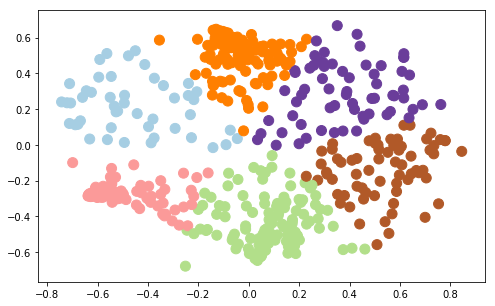

In [69]:
from matplotlib.lines import Line2D

plt.scatter(pos[:, 0], pos[:, 1], 
            c=predicted_clusters, s=100, 
            cmap='Paired')

legend_elements = [Line2D([0], [0], marker='o', color='w',
                         markerfacecolor='#A4CFE0',
                          label='Avengers/Fantastic Four', markersize=15),
                  Line2D([0], [0], marker='o', color='w',
                         markerfacecolor='#9EC6DF',
                          label='Avengers Villians', markersize=15),
                  Line2D([0], [0], marker='o', color='w',
                         markerfacecolor='#FFBE6E',
                          label='Guardians of the Galaxy', markersize=15),
                  Line2D([0], [0], marker='o', color='w',
                         markerfacecolor='#A94D24',
                          label='Fantastic Four', markersize=15),
                  Line2D([0], [0], marker='o', color='w',
                         markerfacecolor='#B2DF8A',
                          label='X-Men', markersize=15),
                  Line2D([0], [0], marker='o', color='w',
                         markerfacecolor='#B2DF8A',
                          label='Runaways', markersize=15),
                  Line2D([0], [0], marker='o', color='w',
                         markerfacecolor='#FFFCB6',
                          label='Hulk', markersize=15)]

# plt.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(1.3, 1.014))

# plt.savefig('marvel_cluster_byEverything_7.png', dpi=600)

## Setting up Cluster Chart demonstrated by brandonrose.org

In [70]:
#set up colors per clusters using a dict
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#FCB230', 4:'#30BBFC', 5:'#3058FC', 6:'#FC30F3',
                 7: '#9BE3E5'}

#set up cluster names using a dict
cluster_names = {0: 'Guardians of the Galaxy', 
                 1: 'Fantastic Four/Avengers', 
                 2: 'Spider-Man',
                3: 'Four',
                4: 'X-Men',
                5: 'Other',
                6: 'Test',
                7: 'Test'}

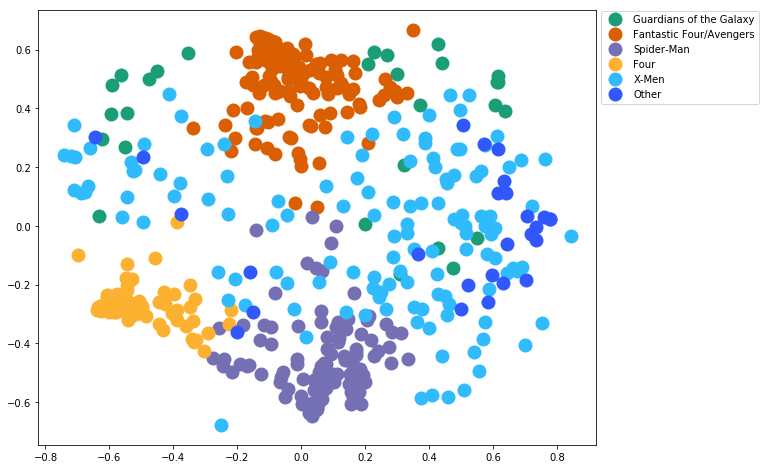

In [71]:
#some ipython magic to show the matplotlib plots inline
%matplotlib inline 

#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=names_list)) 

#group by cluster
groups = df.groupby('label')


# set up plot
fig, ax = plt.subplots(figsize=(10, 8)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=14, 
            label=cluster_names[name], color=cluster_colors[name], 
            mec='none')
#     ax.set_aspect('auto')
#     ax.tick_params(\
#         axis= 'x',          
#         which='both',      
#         bottom='off',     
#         top='off',        
#         labelbottom='off')
#     ax.tick_params(\
#         axis= 'y',         
#         which='both',     
#         left='off',      
#         top='off',        
#         labelleft='off')
    
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.01))  #show legend with only 1 point
    
plt.show() #show the plot

#uncomment the below to save the plot if need be
#plt.savefig('clusters_small_noaxes.png', dpi=200)

In [72]:
plt.close()

In [73]:
import mpld3

In [74]:

#define custom toolbar location
class TopToolbar(mpld3.plugins.PluginBase):
    """Plugin for moving toolbar to top of figure"""

    JAVASCRIPT = """
    mpld3.register_plugin("toptoolbar", TopToolbar);
    TopToolbar.prototype = Object.create(mpld3.Plugin.prototype);
    TopToolbar.prototype.constructor = TopToolbar;
    function TopToolbar(fig, props){
        mpld3.Plugin.call(this, fig, props);
    };

    TopToolbar.prototype.draw = function(){
      // the toolbar svg doesn't exist
      // yet, so first draw it
      this.fig.toolbar.draw();

      // then change the y position to be
      // at the top of the figure
      this.fig.toolbar.toolbar.attr("x", 150);
      this.fig.toolbar.toolbar.attr("y", 400);

      // then remove the draw function,
      // so that it is not called again
      this.fig.toolbar.draw = function() {}
    }
    """
    def __init__(self):
        self.dict_ = {"type": "toptoolbar"}

In [75]:
#create data frame that has the result of the MDS plus the cluster numbers and heroes
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, heroes=names_list)) 

#group by cluster
groups = df.groupby('label')

#define custom css to format the font and to remove the axis labeling
css = """
text.mpld3-text, div.mpld3-tooltip {
  font-family:Arial, Helvetica, sans-serif;
}

g.mpld3-xaxis, g.mpld3-yaxis {
display: none; }

svg.mpld3-figure {
margin-left: -200px;}
"""

# Plot 
fig, ax = plt.subplots(figsize=(14,6)) #set plot size
ax.margins(0.03) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    points = ax.plot(group.x, group.y, marker='o', linestyle='', ms=18, 
                     label=cluster_names[name], mec='none', 
                     color=cluster_colors[name])
    ax.set_aspect('auto')
    labels = [i for i in group.heroes]
    
    #set tooltip using points, labels and the already defined 'css'
    tooltip = mpld3.plugins.PointHTMLTooltip(points[0], labels,
                                       voffset=10, hoffset=10, css=css)
    #connect tooltip to fig
    mpld3.plugins.connect(fig, tooltip, TopToolbar())    
    
    #set tick marks as blank
    ax.axes.get_xaxis().set_ticks([])
    ax.axes.get_yaxis().set_ticks([])
    
    #set axis as blank
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)

    
ax.legend(numpoints=1) #show legend with only one dot

mpld3.display() #show the plot

#uncomment the below to export to html
#html = mpld3.fig_to_html(fig)
#print(html)

In [ ]:
df.head()

In [ ]:
df['size'] = list(frame.comics_available)

In [ ]:
df_wo_outliers = df.loc[df['label'] != 6]

In [ ]:
df_wo_outliers.head()

In [ ]:
# df_wo_outliers.to_csv('marvel_cluster_no_OL.csv', index=False)

In [ ]:
len(df.loc[df['label'] == 2])